In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame
from pandas import Series
import matplotlib.pyplot as plt
import seaborn as sns
import FinanceDataReader as fdr
import matplotlib

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:\\Windows\\Fonts\\malgun.ttf").get_name()
plt.rc("font", family=font_name)

import matplotlib as mlp
plt.rcParams["axes.grid"] = True
plt.rcParams["figure.figsize"] = (16,8)
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["axes.formatter.limits"] = -10000, 10000

import urllib.request as req
from urllib.request import urlopen
from urllib.error import HTTPError, URLError
import urllib.parse
from bs4 import BeautifulSoup
import requests

plt.style.use("ggplot")

In [2]:
# 삼성전자(005930) 전체 (1996-11-05 ~ 현재)
df = fdr.DataReader('005930')
df

,Open,High,Low,Close,Volume,Change
Date,,,,,,
1998-05-21,1130,1139,1061,1061,605730,NaN
1998-05-22,1029,1042,1014,1026,465530,-0.032988
1998-05-23,1051,1068,1033,1033,285990,0.006823
1998-05-25,970,1020,912,912,456620,-0.117135
1998-05-26,875,893,837,847,422200,-0.071272
...,...,...,...,...,...,...
2022-07-21,61100,61900,60700,61800,12291374,0.021488
2022-07-22,61800,62200,61200,61300,10261310,-0.008091
2022-07-25,60900,61900,60800,61100,9193681,-0.003263


In [5]:
#data 형식변경(test)
df.index = df.index.strftime('%Y/%m/%d') 

AttributeError: 'Index' object has no attribute 'strftime'

In [7]:
# data 형식변경 확인 (test)
df

,Open,High,Low,Close,Volume,Change
Date,,,,,,
1998/05/09,1210,1225,1210,1216,64040,NaN
1998/05/11,1215,1221,1191,1192,195520,-0.019737
1998/05/12,1182,1200,1156,1177,243650,-0.012584
1998/05/13,1163,1219,1148,1205,359030,0.023789
1998/05/14,1202,1288,1191,1221,308030,0.013278
...,...,...,...,...,...,...
2022/07/07,56400,58700,56300,58200,21322833,0.031915
2022/07/08,58600,59300,58200,58700,15339271,0.008591
2022/07/11,59300,59600,58700,58800,13042624,0.001704


In [89]:
# df = fdr.DataReader('KS11', '2016-01-04', '2021-12-31')
# df_kr = df.drop(['Low','High','Open'], axis=1)
# df_kr

# df_kr.to_csv("2016_2021코스피.csv")

# df = fdr.DataReader('KQ11', '2016-01-04', '2021-12-31')
# df.drop(['Open'], axis=1)
# df.drop(['High'], axis=1)
# df_na = df.drop(['Low','High','Open'], axis=1)
# df_na

# df_na.to_csv("2016_2021나스닥.csv")


<AxesSubplot:xlabel='Date'>

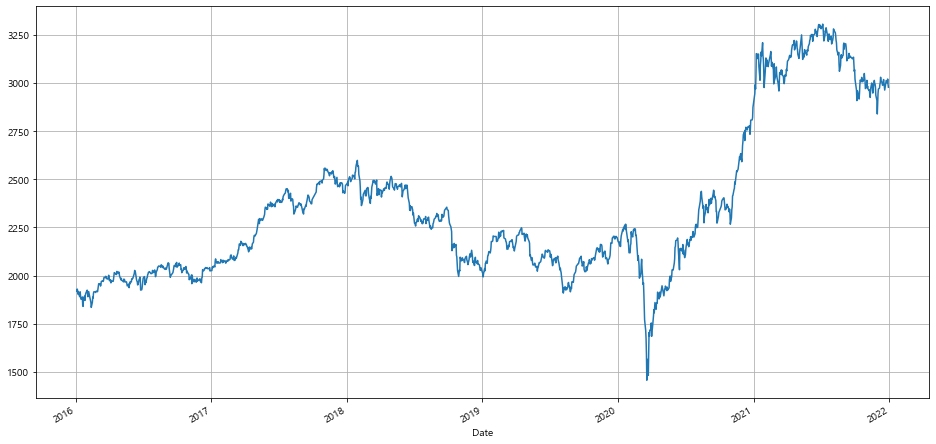

In [12]:
#코스피 5년치 그래프
ks11 = fdr.DataReader('KS11', '2016/01/04', '2021/12/31',data_source='close')
ks11['Close'].plot()

<AxesSubplot:xlabel='Date'>

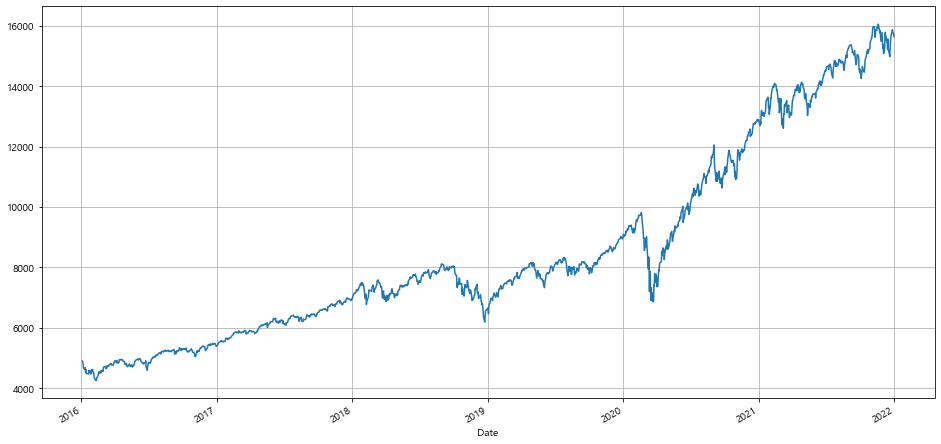

In [13]:
#나스닥 5년치 그래프
IXIC = fdr.DataReader('IXIC', '2016/01/04', '2021/12/31',data_source='close')
IXIC['Close'].plot()

In [63]:
#stock_list = ks11['Close'],IXIC['Close']

In [26]:
## 주석처리되어있었음
df_list = [fdr.DataReader(code, '2016-01-01', '2021-12-31')['Close'] for name, code in stock_list]
df_list

[Date
 2016-01-04     4903.09
 2016-01-05     4891.43
 2016-01-06     4835.77
 2016-01-07     4689.43
 2016-01-08     4643.63
                 ...   
 2021-12-27    15871.26
 2021-12-28    15781.72
 2021-12-29    15766.22
 2021-12-30    15741.56
 2021-12-31    15644.97
 Name: Close, Length: 1511, dtype: float64,
 Date
 2016-01-04    1918.76
 2016-01-05    1930.53
 2016-01-06    1925.43
 2016-01-07    1904.33
 2016-01-08    1917.62
                ...   
 2021-12-24    3012.43
 2021-12-27    2999.55
 2021-12-28    3020.24
 2021-12-29    2993.29
 2021-12-30    2977.65
 Name: Close, Length: 1475, dtype: float64]

In [66]:
# df = pd.concat(df_list, axis=1)
# df.columns = [name for name, code in stock_list] 
# df.head(10)

In [69]:
#df.plot()

In [95]:
#나스닥 결측치제거
IXIC = fdr.DataReader('IXIC', '2016-01-04', '2021-12-31',data_source='close')

IXIC.dropna(axis=0)
IXIC.head(50)

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2016-01-04,4903.09,4897.65,4903.09,4846.98,569790000.0,-0.0208
2016-01-05,4891.43,4917.84,4926.73,4872.74,428070000.0,-0.0024
2016-01-06,4835.77,4813.76,4866.04,4804.69,501750000.0,-0.0114
2016-01-07,4689.43,4736.40,4788.02,4688.17,590070000.0,-0.0303
2016-01-08,4643.63,4722.02,4742.57,4637.85,540570000.0,-0.0098
2016-01-11,4637.99,4673.44,4683.02,4573.77,528170000.0,-0.0012
2016-01-12,4685.92,4681.54,4714.80,4618.03,498550000.0,0.0103
2016-01-13,4526.06,4706.02,4713.98,4517.56,570190000.0,-0.0341
2016-01-14,4615.00,4545.37,4650.55,4470.59,593870000.0,0.0197


In [12]:
#코스피 결측치제거
ks11 = fdr.DataReader('ks11', '2010-01-04', '2021-12-31',data_source='close')

ks11.dropna(axis=0)
ks11.head(50)

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2010-01-04,1696.14,1681.71,1696.14,1681.71,296550000.0,0.0079
2010-01-05,1690.62,1701.62,1702.39,1686.45,408850000.0,-0.0033
2010-01-06,1705.32,1697.88,1706.89,1696.10,426040000.0,0.0087
2010-01-07,1683.45,1702.92,1707.90,1683.45,462400000.0,-0.0128
2010-01-08,1695.26,1694.06,1695.26,1668.84,379950000.0,0.0070
2010-01-11,1694.12,1700.79,1705.73,1694.12,407680000.0,-0.0007
2010-01-12,1698.64,1695.83,1701.16,1683.29,383760000.0,0.0027
2010-01-13,1671.41,1683.51,1687.58,1671.11,361930000.0,-0.0160
2010-01-14,1685.77,1680.68,1692.78,1677.46,433750000.0,0.0086


In [81]:
stock_list = [
  ["나스닥", "IXIC"],
  ["코스피", "ks11"],
]

In [13]:
df_list = [fdr.DataReader(code, '2010-01-04', '2021-12-31')['Close'] for name, code in stock_list]
len(df_list)


AttributeError: 'DataFrame' object has no attribute 'isdigit'

In [83]:
# pd.concat()로 합치기

df = pd.concat(df_list, axis=1)
df.columns = [name for name, code in stock_list]
df.head(50)

,나스닥,코스피
Date,,
2016-01-04,4903.09,1918.76
2016-01-05,4891.43,1930.53
2016-01-06,4835.77,1925.43
2016-01-07,4689.43,1904.33
2016-01-08,4643.63,1917.62
2016-01-11,4637.99,1894.84
2016-01-12,4685.92,1890.86
2016-01-13,4526.06,1916.28
2016-01-14,4615.00,1900.01


In [39]:
#날짜형식변경
df.index = df.index.strftime('%Y/%m/%d') 

In [48]:
# 결측치확인
df.head(20)

,나스닥,코스피
Date,,
2016/01/04,4903.09,1918.76
2016/01/05,4891.43,1930.53
2016/01/06,4835.77,1925.43
2016/01/07,4689.43,1904.33
2016/01/08,4643.63,1917.62
2016/01/11,4637.99,1894.84
2016/01/12,4685.92,1890.86
2016/01/13,4526.06,1916.28
2016/01/14,4615.00,1900.01


In [85]:
# 결측치 최근 앞에 등장한 값으로 변경
df = df.fillna(method = 'ffill')


In [46]:
#확인
df.head(20)

,나스닥,코스피
Date,,
2016/01/04,4903.09,1918.76
2016/01/05,4891.43,1930.53
2016/01/06,4835.77,1925.43
2016/01/07,4689.43,1904.33
2016/01/08,4643.63,1917.62
2016/01/11,4637.99,1894.84
2016/01/12,4685.92,1890.86
2016/01/13,4526.06,1916.28
2016/01/14,4615.00,1900.01


<AxesSubplot:xlabel='Date'>

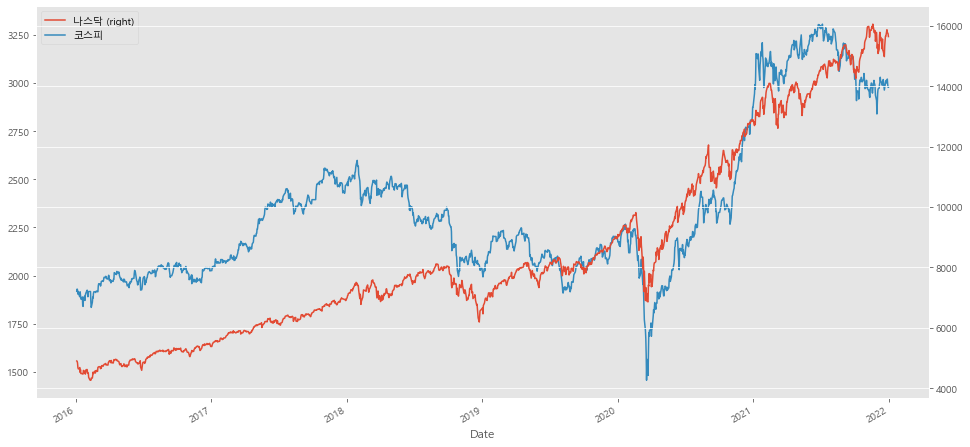

In [86]:
# 2016~2021 코스피/나스닥 일별 데이터 선 그래프

df[['나스닥', '코스피']].plot(secondary_y=['나스닥'])

In [ ]:
#거래량 뽑아보기

<AxesSubplot:ylabel='Frequency'>

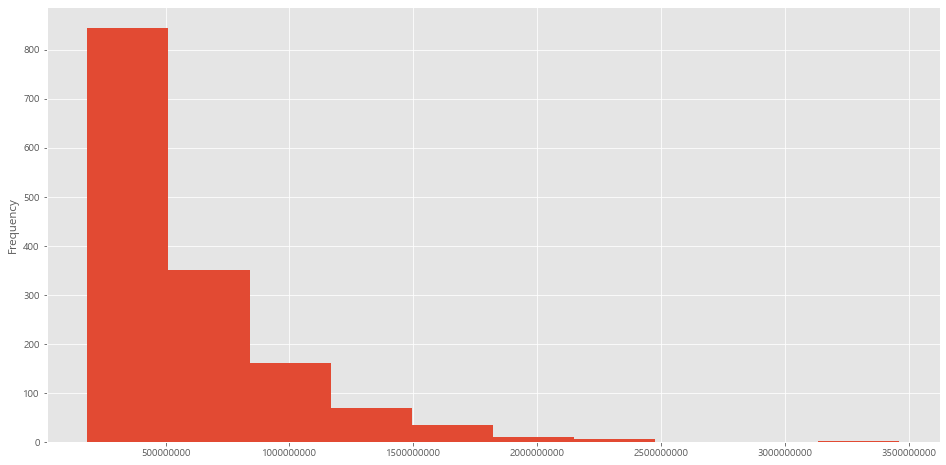

In [65]:
ks11 = fdr.DataReader('KS11', '2016/01/04', '2021/12/31',data_source='Close')
#ks11
ks11['Volume'].plot.hist()

In [66]:
ks11.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1475 entries, 2016-01-04 to 2021-12-30
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1475 non-null   float64
 1   Open    1475 non-null   float64
 2   High    1475 non-null   float64
 3   Low     1475 non-null   float64
 4   Volume  1475 non-null   float64
 5   Change  1475 non-null   float64
dtypes: float64(6)
memory usage: 80.7 KB


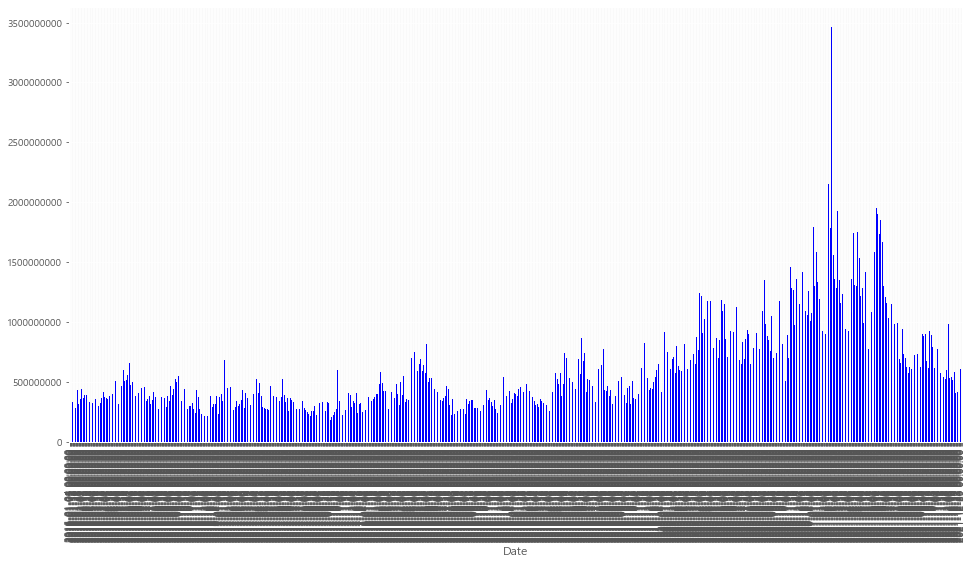

In [98]:
# 거래량 bar 차트로 출력
ks11_vol = fdr.DataReader('KS11', '2016/01/04', '2021/12/31',data_source='Close')['Volume']
ks11_vol.plot.bar(color="blue")

plt.show()

In [96]:
# 캔들차트 (코스피)
fdr.chart.plot(ks11)

Loading BokehJS ...

In [97]:
# 캔들차트 (나스닥)
fdr.chart.plot(IXIC)

Loading BokehJS ...

<AxesSubplot:xlabel='Date'>

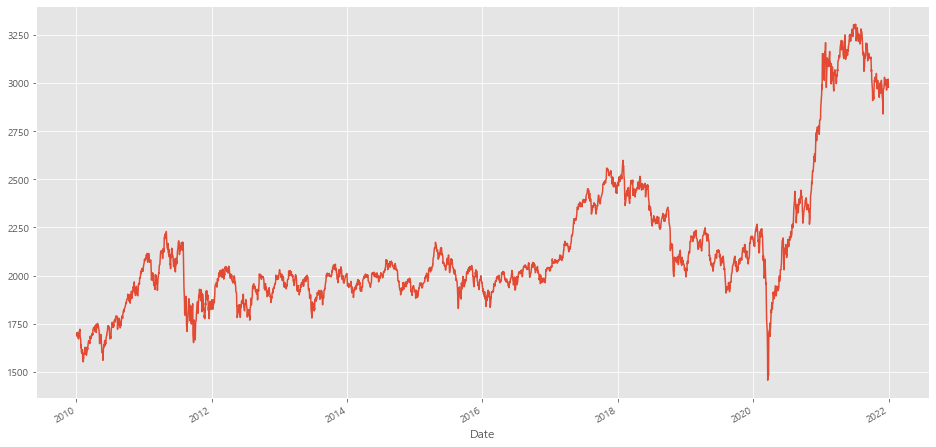

In [11]:
Nasdaq = pd.read_csv("C:/Users/acorn/Desktop/송정우강사/파이널프로젝트 1,4팀/data/2016_2021_나스닥.csv", encoding="euc-kr", thousands=",")
Nasdaq

ks11 = fdr.DataReader('KS11', '2010-01-04', '2021-12-31',data_source='close')
ks11['Close'].plot()

In [18]:
Nasdaq.head()

,Date,Close,Volume,Change
0,2016-01-04,677.79,502710.0,-0.0067
1,2016-01-05,684.07,741690.0,0.0093
2,2016-01-06,687.27,747610.0,0.0047
3,2016-01-07,679.66,692150.0,-0.0111
4,2016-01-08,682.56,710750.0,0.0043


In [9]:
Nasdaq['Date'] = pd.to_datetime(Nasdaq['Date'])
Nasdaq['Date']

0      2016-01-04
1      2016-01-05
2      2016-01-06
3      2016-01-07
4      2016-01-08
          ...    
1470   2021-12-24
1471   2021-12-27
1472   2021-12-28
1473   2021-12-29
1474   2021-12-30
Name: Date, Length: 1475, dtype: datetime64[ns]

In [11]:
Nasdaq['YearMonth'] = Nasdaq['Date'].dt.to_period('M')
Nasdaq_month = Nasdaq.groupby('YearMonth').mean().reset_index()
Nasdaq_month
# Nasdaq_month = [g for n, g in Nasdaq.set_index('Date').groupby(pd.Grouper(freq='m'))]
# Nasdaq_month
# coLname = ['columb name']
# Nasdaq_month = [g for n, g in Nasdaq.set_index('Date').groupby(pd.Grouper(freq='m'))]
# 리스트는 plot을 사용 할 수 없으니# 리스트를 데이터 프레임으로 변환한다d
# df_list = pd.DataFrame(Nasdaq_month)
# df_list.value_counts()

# plt.plot(df_list, marker = '*', color = 'r')
# plt.show()

,YearMonth,Close,Volume,Change
0,2016-01,678.811500,6.141055e+05,0.000080
1,2016-02,651.046667,5.388311e+05,-0.002344
2,2016-03,684.440000,5.988873e+05,0.002514
3,2016-04,697.671500,6.730035e+05,0.000835
4,2016-05,693.606000,7.273800e+05,-0.000065
...,...,...,...,...
67,2021-08,1029.975238,1.286834e+09,0.000424
68,2021-09,1035.891053,1.290956e+09,-0.001758
69,2021-10,980.638947,1.312632e+09,-0.000426
70,2021-11,1010.570909,1.209268e+09,-0.001173


In [12]:
Nasdaq_month.head(50)

,YearMonth,Close,Volume,Change
0,2016-01,678.811500,6.141055e+05,0.000080
1,2016-02,651.046667,5.388311e+05,-0.002344
2,2016-03,684.440000,5.988873e+05,0.002514
3,2016-04,697.671500,6.730035e+05,0.000835
4,2016-05,693.606000,7.273800e+05,-0.000065
5,2016-06,686.206190,9.849214e+05,-0.001510
6,2016-07,699.410476,9.414052e+05,0.002171
7,2016-08,691.912727,6.545727e+05,-0.002795
8,2016-09,676.352632,7.330805e+05,0.001411
9,2016-10,660.035000,5.816530e+05,-0.004275


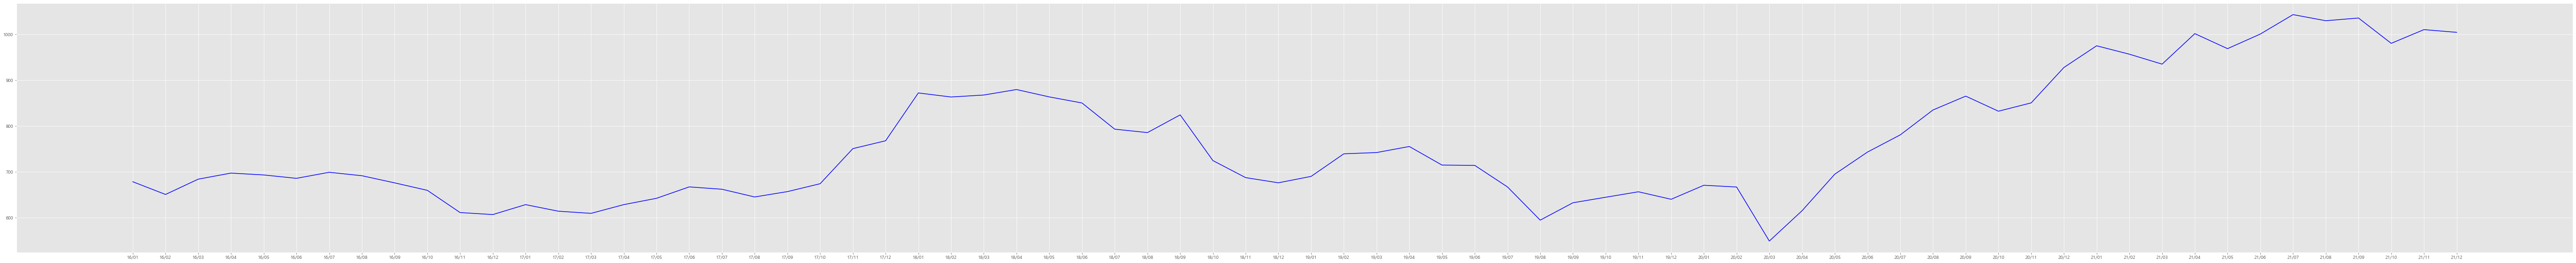

In [15]:
fig, axes = plt.subplots(1, 1, figsize=(100, 10))
axes.plot(Nasdaq_month['YearMonth'].dt.strftime('%y/%m'), Nasdaq_month['Close'], 'b')
# for i, title in enumerate(['Close']):
#     axes[i].set_title(title)
plt.show()

In [24]:
?plt

In [13]:
Nasdaq['YearMonth'] = Nasdaq['Date'].dt.to_period('d')
Nasdaq_day = Nasdaq.groupby('YearMonth').mean().reset_index()
Nasdaq_day.head()

,YearMonth,Close,Volume,Change
0,2016-01-04,677.79,502710.0,-0.0067
1,2016-01-05,684.07,741690.0,0.0093
2,2016-01-06,687.27,747610.0,0.0047
3,2016-01-07,679.66,692150.0,-0.0111
4,2016-01-08,682.56,710750.0,0.0043
5,2016-01-11,674.96,586440.0,-0.0111
6,2016-01-12,671.30,575160.0,-0.0054
7,2016-01-13,686.03,729670.0,0.0219
8,2016-01-14,683.19,561170.0,-0.0041
9,2016-01-15,678.43,595830.0,-0.0070


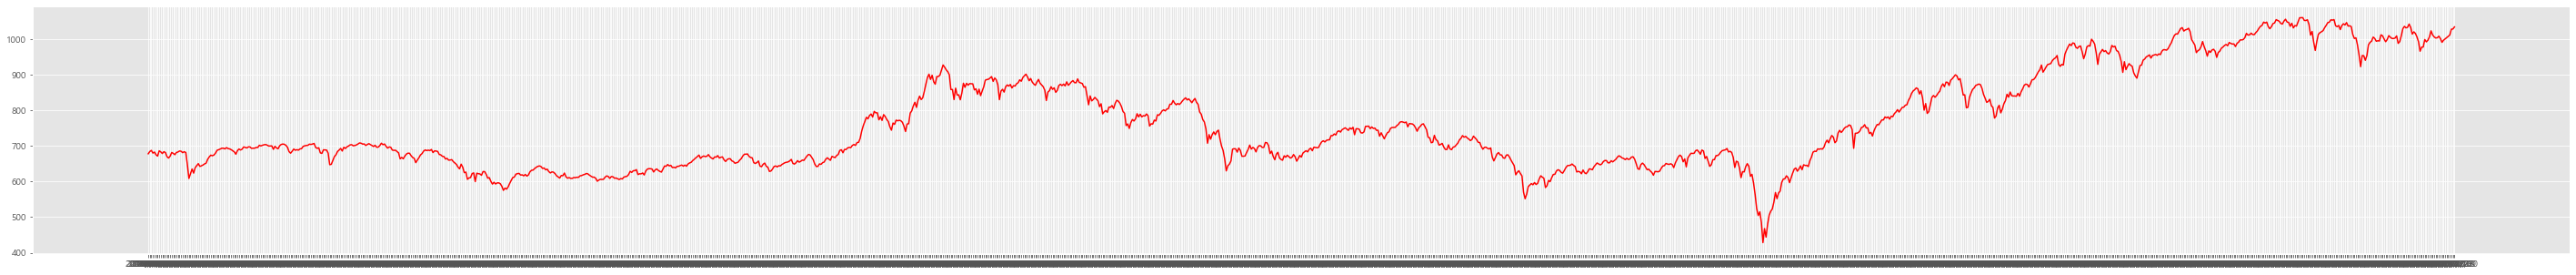

Object `plot` not found.


In [16]:
fig, axes = plt.subplots(1, 1, figsize=(50, 5))
axes.plot(Nasdaq_day['YearMonth'].dt.strftime('%Y/%m/%d'), Nasdaq_day['Close'], 'r')
plt.show()
?plot

In [52]:
## 연별로 출력 dt.to_period('Y')
## 나스닥

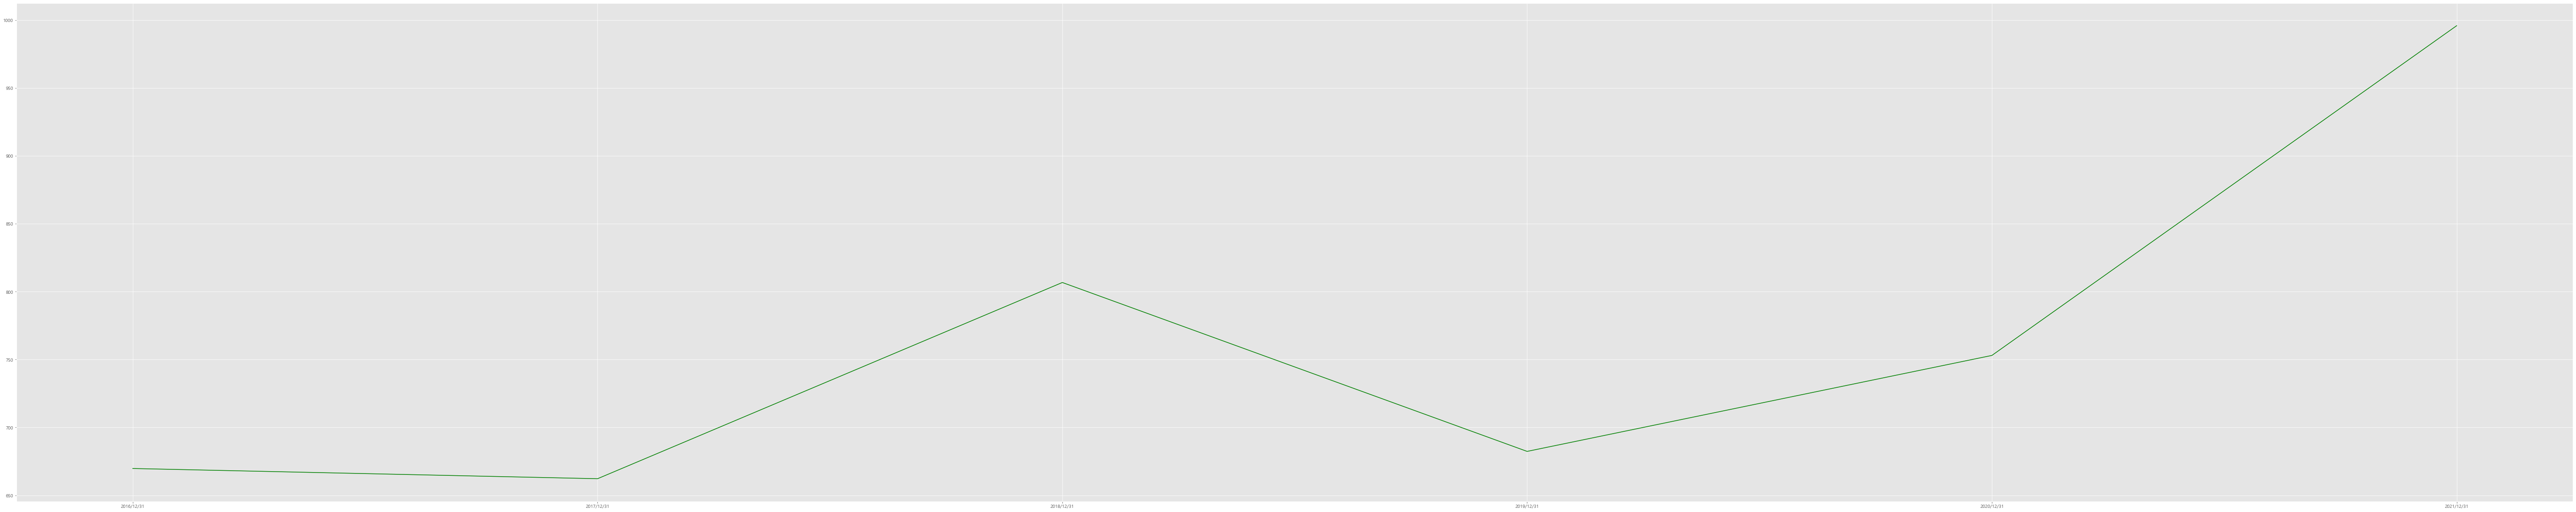

In [17]:
Nasdaq['YearMonth'] = Nasdaq['Date'].dt.to_period('Y')
Nasdaq_year = Nasdaq.groupby('YearMonth').mean().reset_index()
Nasdaq_year

fig, axes = plt.subplots(1, 1, figsize=(100, 20))
axes.plot(Nasdaq_year['YearMonth'].dt.strftime('%Y/%m/%d'), Nasdaq_year['Close'], 'g')
plt.show()

In [106]:
# df = fdr.DataReader('KS11', '2011-01-01', '2021-12-31')
# df_kr = df.drop(['Low','High','Open'], axis=1)
# df_kr

# df_kr.to_csv("10년치 코스피.csv")

# df = fdr.DataReader('KQ11', '2011-01-01', '2021-12-31')
# df.drop(['Open'], axis=1)
# df.drop(['High'], axis=1)
# df_na = df.drop(['Low','High','Open'], axis=1)
# df_na

# df_na.to_csv("10년치 나스닥.csv")

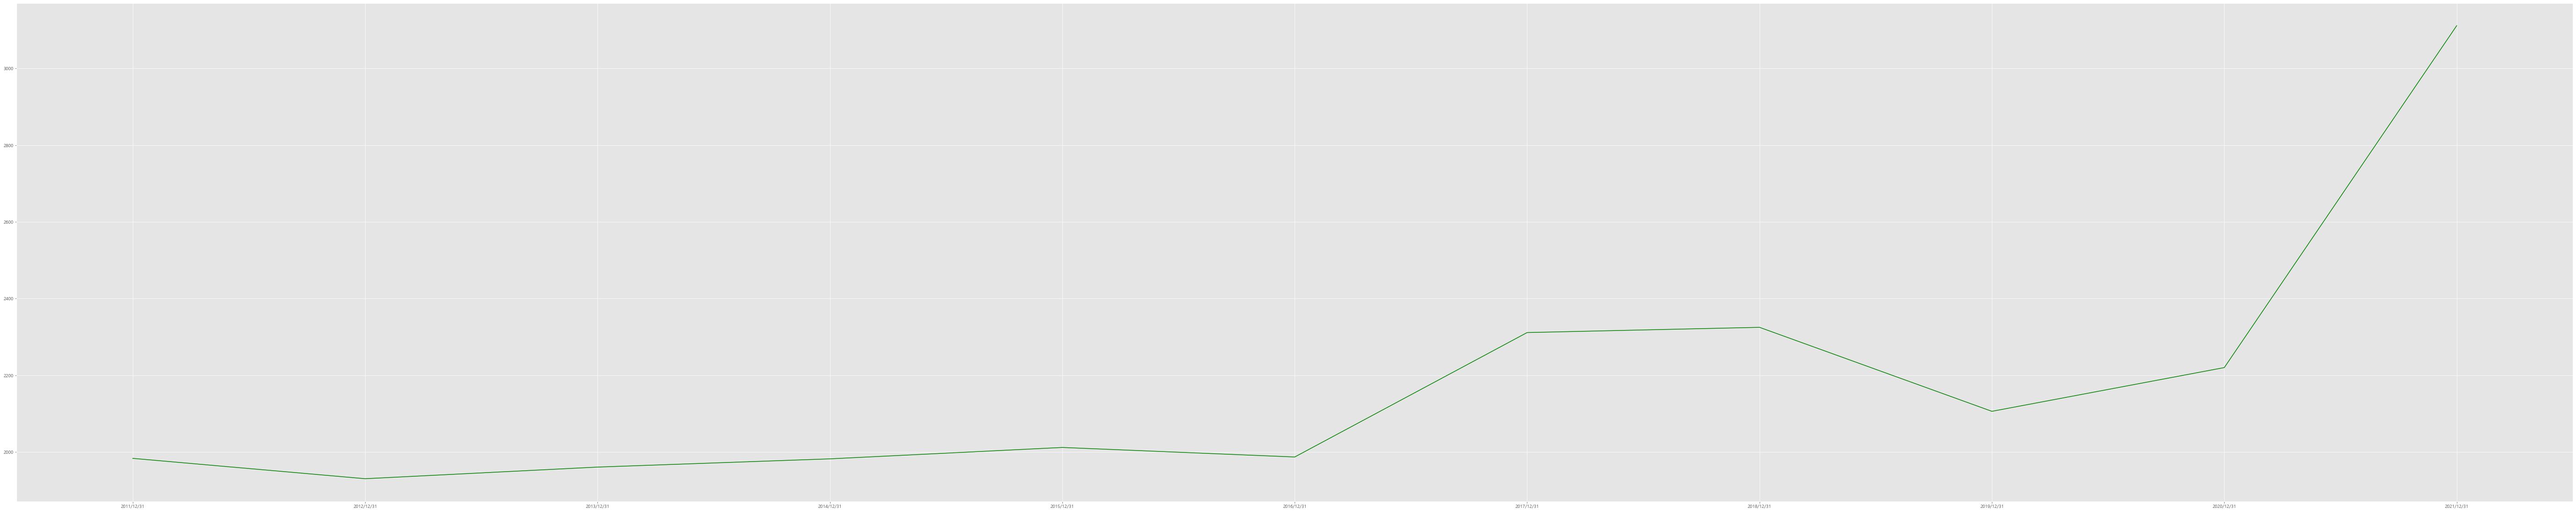

In [18]:
Nasdaq = pd.read_csv("C:/Users/acorn/Desktop/송정우강사/파이널프로젝트 1,4팀/data/10_코스피10년치.csv", encoding="euc-kr", thousands=",")
Nasdaq['Date'] = pd.to_datetime(Nasdaq['Date'])

Nasdaq['YearMonth'] = Nasdaq['Date'].dt.to_period('Y')
Nasdaq_year = Nasdaq.groupby('YearMonth').mean().reset_index()
Nasdaq_year

fig, axes = plt.subplots(1, 1, figsize=(100, 20))
axes.plot(Nasdaq_year['YearMonth'].dt.strftime('%Y/%m/%d'), Nasdaq_year['Close'], 'g')
plt.show()


In [27]:
df = pd.concat(df_list, axis=1)
df.columns = [name for name, code in kr_stock_ratio] 
df.head(10)

NameError: name 'kr_stock_ratio' is not defined

In [21]:
df_KOSPI = fdr.StockListing('KOSPI')

tiker_list= list(df_KOSPI.Symbol)
tiker_list

['095570',
 '006840',
 '152100',
 '295820',
 '253150',
 '253160',
 '395750',
 '395760',
 '278420',
 '429740',
 '436180',
 '292750',
 '309210',
 '333940',
 '333950',
 '333960',
 '333970',
 '333980',
 '269530',
 '433850',
 '433860',
 '433870',
 '433880',
 '421320',
 '251590',
 '161510',
 '251600',
 '289670',
 '298340',
 '189400',
 '419650',
 '415920',
 '278620',
 '429760',
 '269540',
 '287180',
 '213630',
 '332610',
 '426410',
 '332620',
 '195970',
 '238670',
 '195980',
 '373530',
 '256450',
 '239660',
 '280920',
 '266550',
 '301400',
 '301410',
 '227830',
 '122090',
 '328370',
 '301440',
 '376250',
 '027410',
 '282330',
 '138930',
 '001460',
 '001465',
 '001040',
 '079160',
 '00104K',
 '000120',
 '011150',
 '011155',
 '001045',
 '097950',
 '097955',
 '000590',
 '012030',
 '016610',
 '005830',
 '000990',
 '000995',
 '139130',
 '001530',
 '000210',
 '001880',
 '000215',
 '375500',
 '37550L',
 '37550K',
 '007340',
 '004840',
 '155660',
 '069730',
 '017940',
 '365550',
 '383220',
 '007700',

In [22]:
stock_list = [
  ["나스닥", "IXIC"],
  ["코스피", "ks11"],
]

In [10]:
df_list = [fdr.DataReader(code, '2016-01-04', '2021-12-31')['Close'] for name, code in stock_list]
len(df_list)

2

In [ ]:
# pd.concat()로 합치기

df = pd.concat(df_list, axis=1)
df.columns = [name for name, code in stock_list]
df.head(10)

In [4]:
def stock_code(val):
    df_kospi = fdr.StockListing("KOSPI")
    name = df_kospi[df_kospi['Name']==val]
    symbol = name.iloc[0,0]
    return symbol

In [5]:
#종목이름 입력시 해당 종목의 주식코드번호 생성
stock_code('삼성전자')

'005930'

In [11]:
stock_list = [
  ["나스닥", "IXIC"],
  ["셀트리온", stock_code("셀트리온")],
]
print(stock_list)

[['나스닥', 'IXIC'], ['셀트리온', '068270']]


In [12]:
df_list = [fdr.DataReader(code, '2016-01-04', '2021-12-31')['Close'] for name, code in stock_list]

In [13]:
df = pd.concat(df_list, axis=1)
df.columns = [name for name, code in stock_list] 
df.head(10)

,나스닥,셀트리온
Date,,
2016-01-04,4903.09,76803.0
2016-01-05,4891.43,77750.0
2016-01-06,4835.77,78956.0
2016-01-07,4689.43,78956.0
2016-01-08,4643.63,83088.0
2016-01-11,4637.99,85413.0
2016-01-12,4685.92,84208.0
2016-01-13,4526.06,90495.0
2016-01-14,4615.00,89547.0


<AxesSubplot:xlabel='Date'>

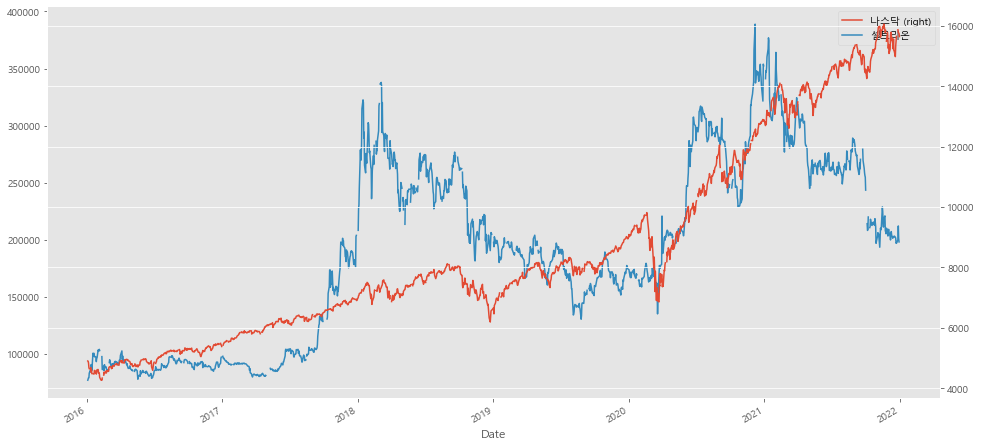

In [15]:
df[['나스닥', '셀트리온']].plot(secondary_y=['나스닥'])

In [ ]:
# 통화량 (달러)
## M1(dollar) WM1NS
## M2(dollar) WM2NS

## M1 for the Republic of Korea (MANMM101KRM189S)
## M2 for Republic of Korea (MYAGM2KRM189S)

In [2]:
import matplotlib.pyplot as plt

plt.rcParams["axes.grid"] = True
plt.rcParams["figure.figsize"] = (12,6)
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["axes.formatter.limits"] = -10000, 10000

Text(0.5, 1.0, 'KRW M2')

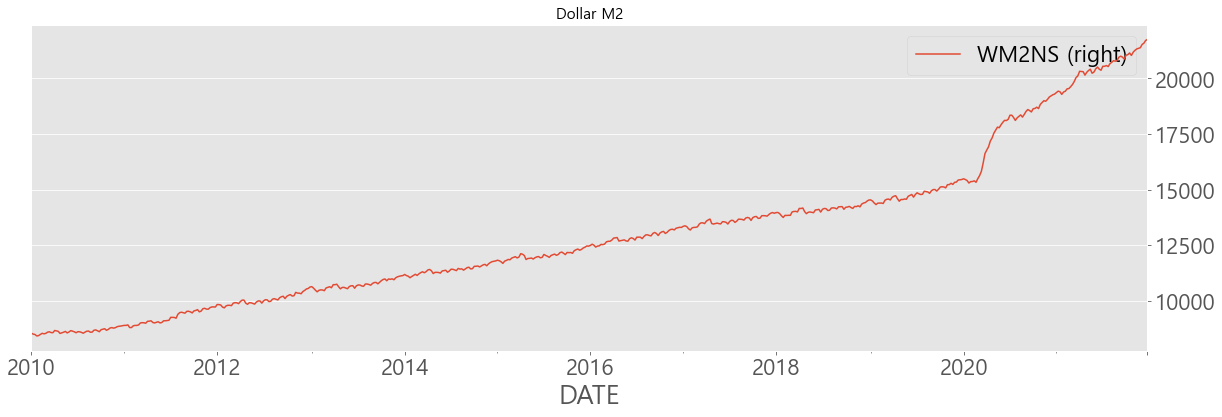

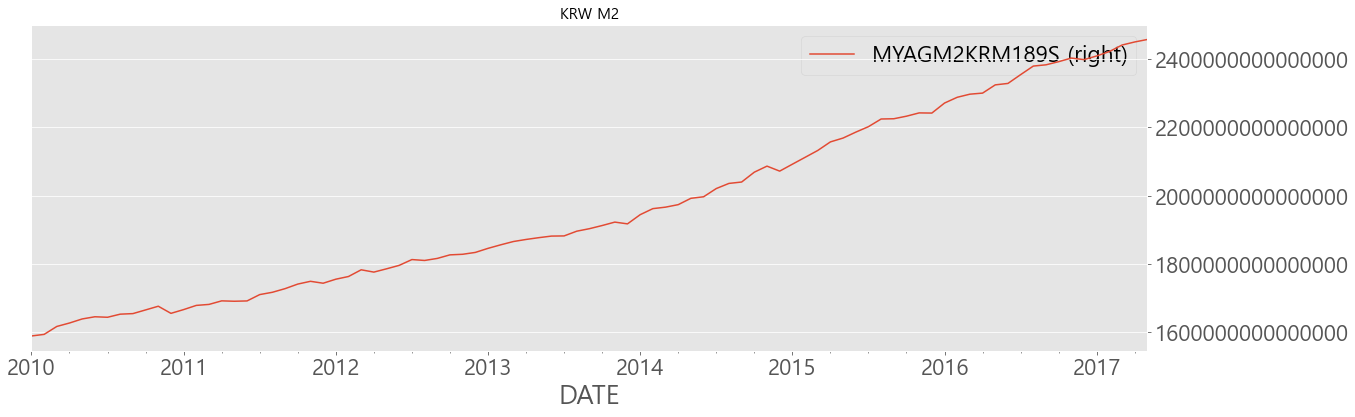

In [121]:
# 달러 통화량
df = fdr.DataReader(['WM2NS'], start='2010',end='2022', data_source='fred')
ax = df.plot(secondary_y='WM2NS')
ax.set_title('Dollar M2', fontsize=15)

# 원화 통화량
df = fdr.DataReader(['MYAGM2KRM189S'], start='2010', data_source='fred')
ax = df.plot(secondary_y='MYAGM2KRM189S')
ax.set_title('KRW M2', fontsize=15)

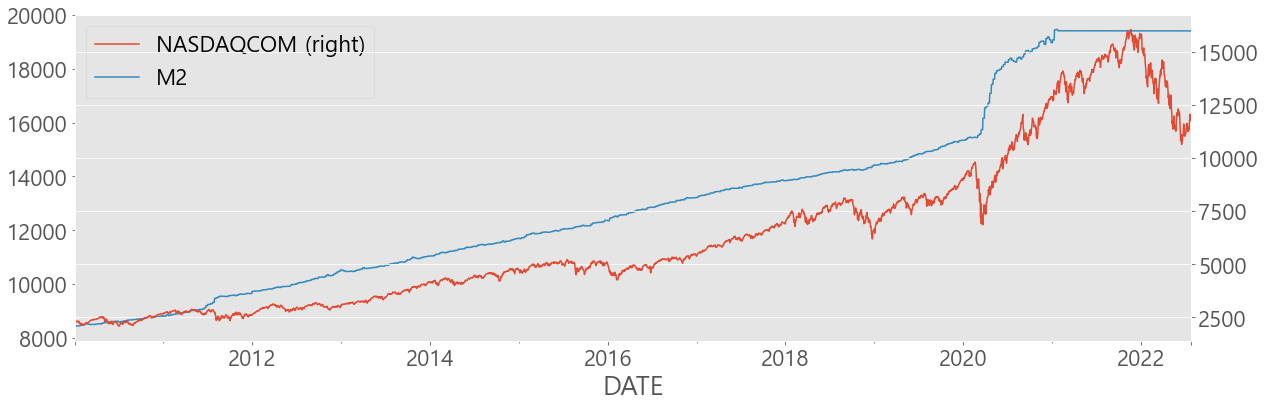

In [95]:
# 나스닥 종합주가지수
df = fdr.DataReader(['NASDAQCOM', 'M2'], start='2010', data_source='fred')
ax = df.plot(secondary_y='NASDAQCOM')

TypeError: unhashable type: 'numpy.ndarray'

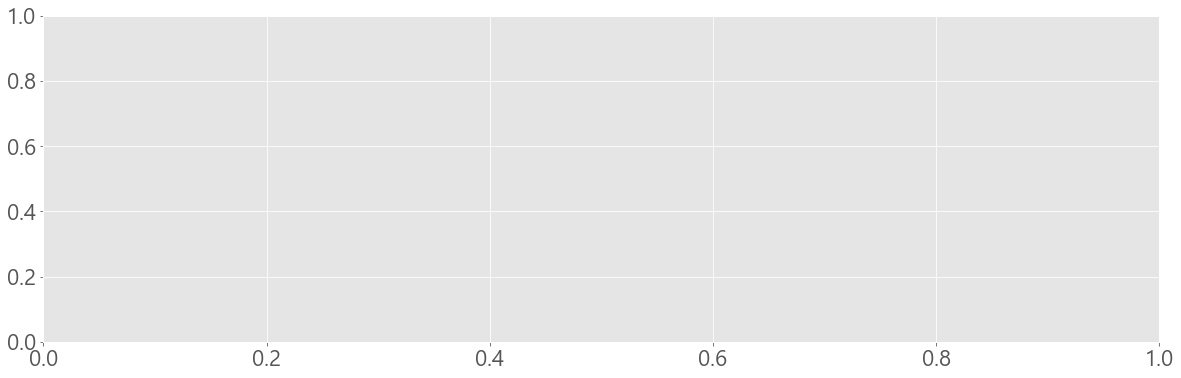

In [83]:
df=pd.read_csv('C:/PythonWork/Final_Project/data/33333.csv')

plt.plot(df)
# fig, ax = plt.subplots(figsize=(20,10))
# ax.set_title('KR M2', fontsize=15)
# ax.set_ylabel("원(십억원)")
# ax.set_xlabel("DATE")
# ax.plot(df['변환'], df['원자료'] )
# plt.show()

In [111]:
krw=pd.read_csv('C:/PythonWork/Final_Project/data/33333.csv')

# 년도 리스트
years = []
# 인구수 리스트
krw = []

for line in df: 
    (year, krw) = line.split(',')       
    years.append(int(year))
    populations.append(int(population))

data_f.close() 

ValueError: not enough values to unpack (expected 2, got 1)

Text(0.5, 1.0, 'Dollar M2')

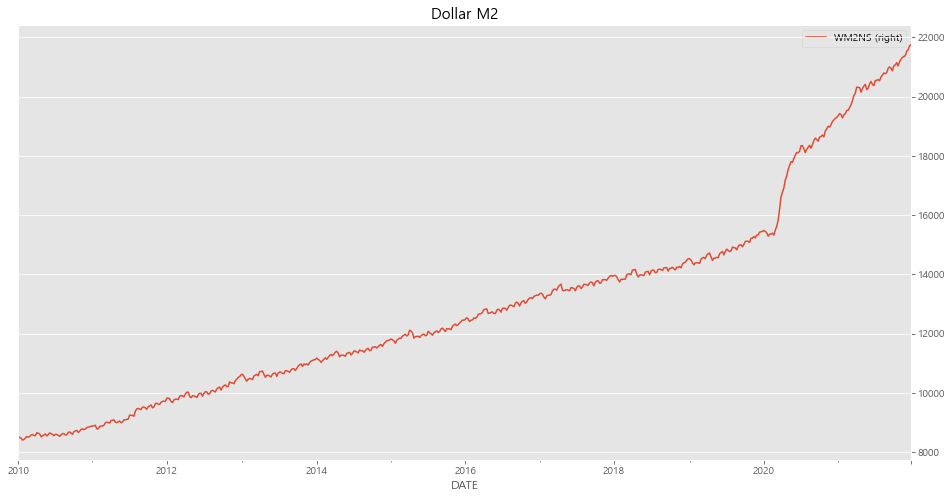

In [2]:
# 달러 통화량
df = fdr.DataReader(['WM2NS'], start='2010',end='2022', data_source='fred')
ax = df.plot(secondary_y='WM2NS')
ax.set_title('Dollar M2', fontsize=15)

Index(['date', 'value'], dtype='object')


<AxesSubplot:xlabel='date'>

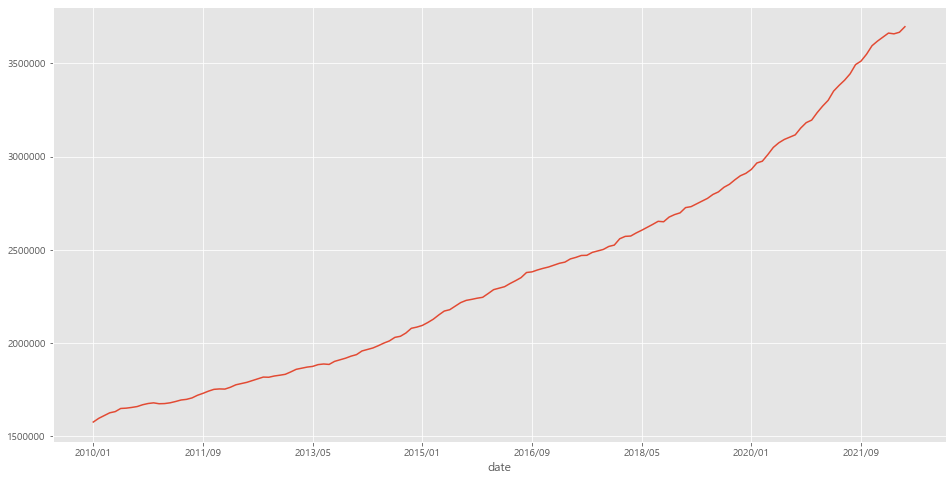

In [28]:
# 원화 통화량
krw=pd.read_csv('C:/PythonWork/Final_Project/data/kr_m2.csv',encoding='utf-8', thousands=',')
# krw.dtypes
# krw['변환']=krw['변환'].astype(date)
# krw['원자료']=krw['원자료'].astype(float)
#date = krw['변환']

krw.columns = ['date','value'] #컬럼명 변경
print(krw.columns) # 컬럼명 변경 확인

vv = val.values
vv

KR_M2 = pd.DataFrame(vv, index= krw['date'], columns=['value'])
KR_M2

KR_M2['value'].plot()


In [ ]:
# 통화량(원)/달러

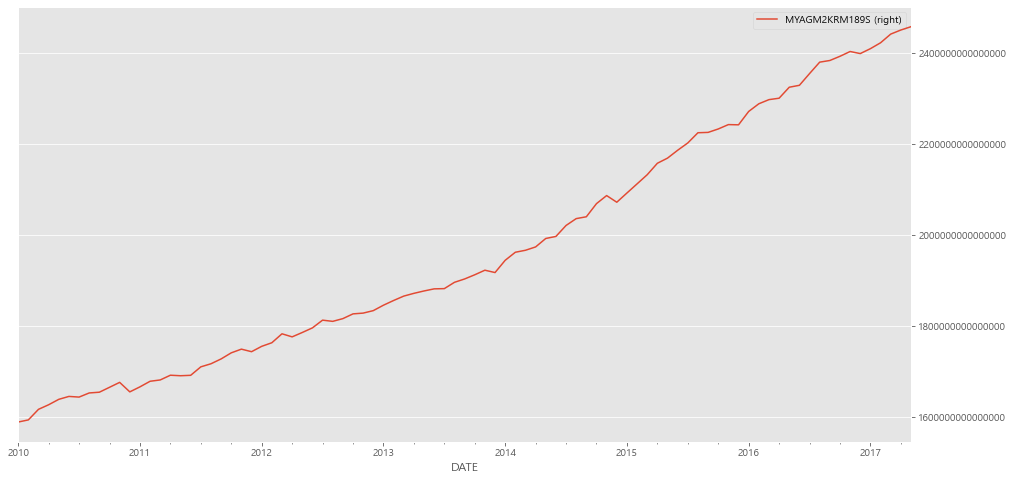

In [5]:
# 통화량 원(2010~2017)
df = fdr.DataReader(['MYAGM2KRM189S'], start='2010', data_source='fred')
ax = df.plot(secondary_y='MYAGM2KRM189S')

In [ ]:
# 원화 & 달러 통화량

In [8]:
#원화
df = pd.read_csv("C:/PythonWork/Final_Project/data/kr_m2.csv", encoding='utf-8', thousands=',')


val = df['Value1']
vv = val.values
vv

KR_M2 = pd.DataFrame(vv, index= df['Date'], columns=['Value1'])
KR_M2

# KR_M2['Value1'].plot()
# print(type(val))
# fig = px.line(df['원자료'])
# fig.show()
# df['원자료'].plot()
# df
# Date = df['Date']
# Value = df['Value']
# KR_M2 = pd.DataFrame((zip()))

,Value1
Date,
2010/01,1576035.9
2010/02,1595958.9
2010/03,1610861.1
2010/04,1625527.4
2010/05,1631875.4
...,...
2022/01,3640778.4
2022/02,3662622.9
2022/03,3658533.9


In [9]:
#달러 
df = pd.read_csv("C:/PythonWork/Final_Project/data/US_M2.csv", encoding='utf-8', thousands=',')


val = df['Value2']
vv = val.values
vv

US_M2 = pd.DataFrame(vv, index= df['Date'], columns=['Value2'])
US_M2

,Value2
Date,
2010/01,8411.2
2010/02,8508.5
2010/03,8557.8
2010/04,8526.0
2010/05,8589.7
...,...
2022/01,21518.9
2022/02,21659.4
2022/03,21846.4


<AxesSubplot:xlabel='Date'>

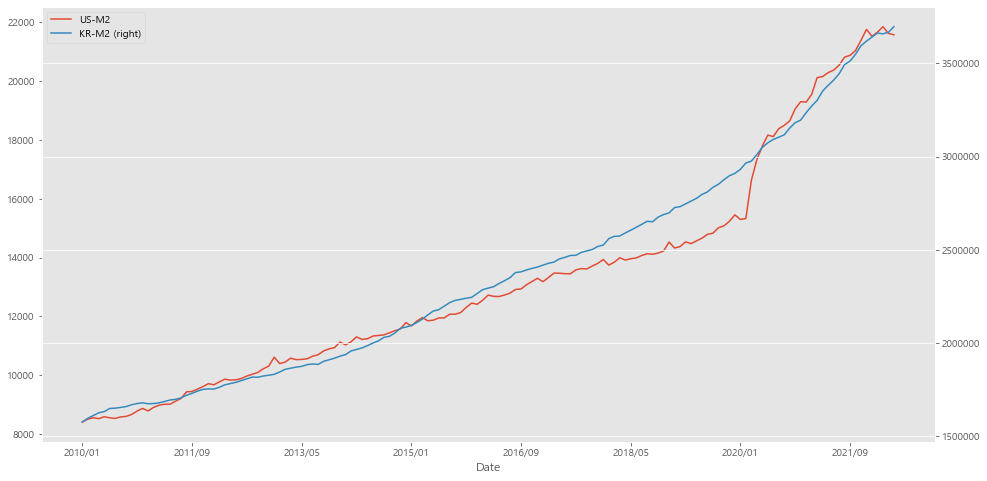

In [10]:
stock_list = [
  ["US-M2", US_M2],
  ["KR-M2", KR_M2],
]
df = pd.concat([US_M2,KR_M2], axis=1)
df.columns = [name for name, code in stock_list]
df.head(50)

df[['US-M2', 'KR-M2']].plot(secondary_y=['KR-M2'])

In [ ]:
## 원화&코스피

<AxesSubplot:xlabel='Date'>

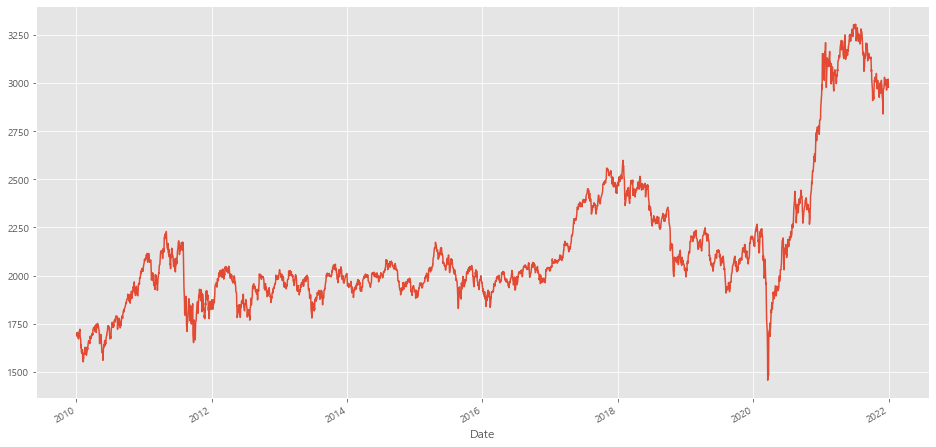

In [14]:
#코스피
ks11 = fdr.DataReader('KS11', '2010-01-04', '2021-12-31',data_source='close')
ks11['Close'].plot()

In [26]:
#원화
df = pd.read_csv("C:/PythonWork/Final_Project/data/kr_m2.csv", encoding='utf-8', thousands=',')


val = df['Value1']
vv = val.values
vv

KR_M2 = pd.DataFrame(vv, index= df['Date'], columns=['Value1'])
KR_M2

,Value1
Date,
2010/01,1576035.9
2010/02,1595958.9
2010/03,1610861.1
2010/04,1625527.4
2010/05,1631875.4
...,...
2022/01,3640778.4
2022/02,3662622.9
2022/03,3658533.9


In [25]:
stock_list = [
  ["ks11", ks11],
  ["KR-M2", KR_M2],
]
df = pd.concat([ks11,KR_M2], axis=1)
df.columns = [name for name, code in stock_list]
df.head(50)

df[['ks11', 'KR-M2']].plot(secondary_y=['KR-M2'])

ValueError: Length mismatch: Expected axis has 7 elements, new values have 2 elements

In [ ]:
# 환율

C:\Users\acorn\anaconda3\lib\site-packages\FinanceDataReader\data.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(more)
C:\Users\acorn\anaconda3\lib\site-packages\FinanceDataReader\data.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(more)


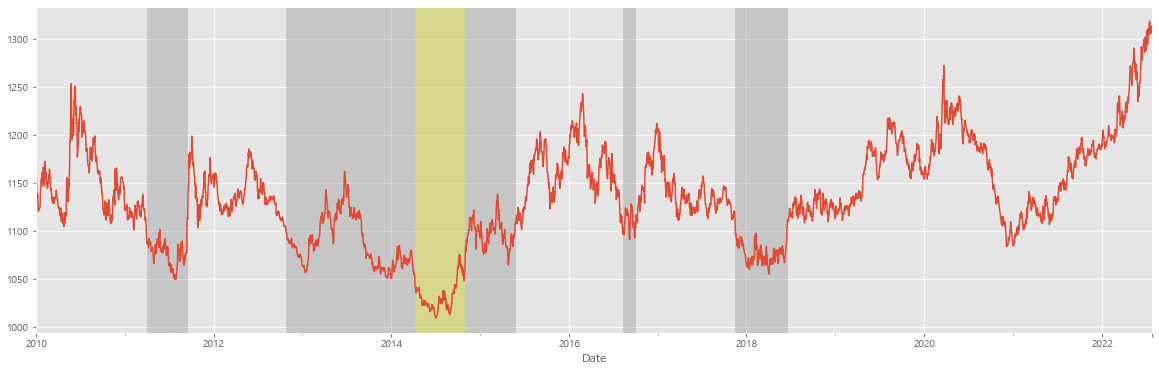

In [6]:
plt.rcParams["figure.figsize"] = (20,6)
USD_KRX = fdr.DataReader('USD/KRW')#미국 달러/한국 원(원달러)
graph = USD_KRX.loc['2010-01-01':,'Close'].plot()#2010년 데이터 부터
##graph.axhline(1000, ls='--', color='r')#1000선
##graph.axhline(1050, ls='--', color='r')#1050선
##graph.axhline(1100, ls='--', color='r')#1100선
#1100원 아래는 회색
graph.axvspan('2007-01-01', '2008-09-10', color='gray', alpha=0.3)
graph.axvspan('2011-03-31', '2011-09-13', color='gray', alpha=0.3)
graph.axvspan('2012-10-25', '2015-05-25', color='gray', alpha=0.3)
graph.axvspan('2016-08-10', '2016-09-28', color='gray', alpha=0.3)
graph.axvspan('2017-11-16', '2018-06-14', color='gray', alpha=0.3)
#1050원 아래는 노란색
graph.axvspan('2007-01-01', '2008-08-21', color='yellow', alpha=0.3)
graph.axvspan('2011-07-26', '2011-07-26', color='yellow', alpha=0.3)
graph.axvspan('2014-04-09', '2014-10-28', color='yellow', alpha=0.3)

<AxesSubplot:xlabel='Date'>

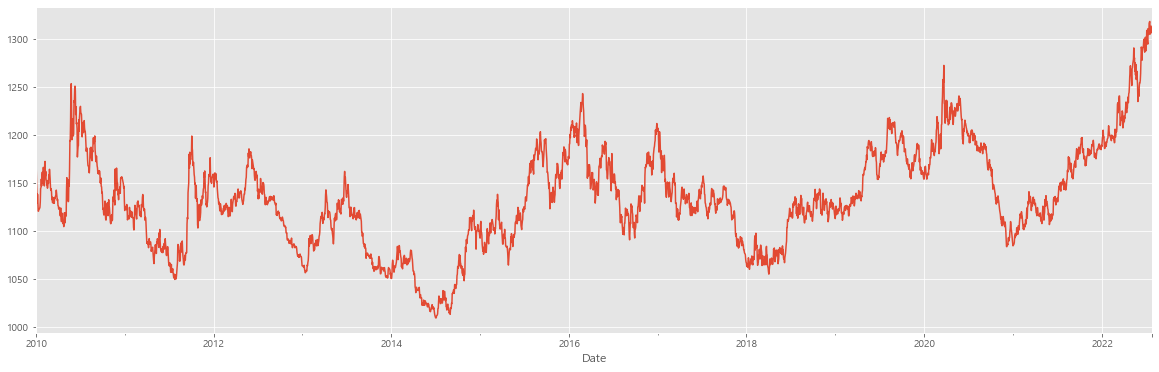

In [20]:
# 원달러 환율, 1995년~현재
df = fdr.DataReader('USD/KRW', '2010')
df['Close'].plot()

In [2]:
import sys # 시스템
import os  # 시스템

import pandas as pd  # 판다스 : 데이터분석 라이브러리
import numpy as np   # 넘파이 : 숫자, 행렬 데이터 라이브러리
import requests

from selenium import webdriver   # 웹 브라우저 자동화
import time    # 서버와 통신할 때 중간중간 시간 지연. 보통은 1초
#크롬 웹브라우저 실행
driver = webdriver.Chrome("C:/PythonWork/Final_Project/data/chromedriver.exe")
url = "https://finance.naver.com/sise/theme.nhn?&page=1"
driver.get(url)
time.sleep(2)
# 해당 html소스에 있는 테이블들을 list안에 있는 dataframe형태로 table 변수에 할당
html = requests.get('https://finance.naver.com/sise/theme.nhn?&page=1') 
table = pd.read_html(html.text)
table[0]

C:\Users\acorn\AppData\Local\Temp\ipykernel_7144\3507176293.py:11: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome("C:/PythonWork/Final_Project/data/chromedriver.exe")


테마명    전일대비 최근3일등락률(평균) 전일대비 등락현황                주도주         
             테마명    전일대비 최근3일등락률(평균)        상승   보합   하락      주도주    주도주.1
0            NaN     NaN         NaN       NaN  NaN  NaN      NaN      NaN
1        인터넷 대표주  +4.09%      -0.20%       2.0  0.0  0.0    NAVER      카카오
2         우주항공산업  +3.72%      +0.44%      22.0  2.0  0.0  한화에어로..       한화
3          풍력에너지  +3.67%      +1.08%      30.0  2.0  3.0    대명에너지    동국S&C
4         제4이동통신  +3.17%      +0.21%       5.0  0.0  0.0       광무       CS
..           ...     ...         ...       ...  ...  ...      ...      ...
59       두나무 관련주  +1.69%      -0.22%      11.0  0.0  1.0      카카오    신성이엔지
60         조선기자재  +1.68%      +0.87%      24.0  3.0  2.0       태웅     메디콕스
61  가상화폐(비트코인 등)  +1.64%      -0.22%      25.0  2.0  4.0  티사이언티..  네오위즈홀..
62           NaN     NaN         NaN       NaN  NaN  NaN      NaN      NaN
63           NaN     NaN         NaN       NaN  NaN  NaN      NaN      NaN

[64 rows x 8 columns]

In [3]:
# NaN값 제거
stock = table[0].dropna().reset_index(drop = True)
stock

테마명    전일대비 최근3일등락률(평균) 전일대비 등락현황                주도주  \
                   테마명    전일대비 최근3일등락률(평균)        상승   보합   하락      주도주   
0              인터넷 대표주  +4.09%      -0.20%       2.0  0.0  0.0    NAVER   
1               우주항공산업  +3.72%      +0.44%      22.0  2.0  0.0  한화에어로..   
2                풍력에너지  +3.67%      +1.08%      30.0  2.0  3.0    대명에너지   
3               제4이동통신  +3.17%      +0.21%       5.0  0.0  0.0       광무   
4       SNS(소셜네트워크서비스)  +3.14%      -0.40%       9.0  0.0  1.0  아프리카T..   
5                항공기부품  +3.04%      +0.71%      12.0  2.0  1.0  한화에어로..   
6                   여행  +2.69%      -0.25%       9.0  1.0  0.0    레드캡투어   
7                 종합상사  +2.68%      +0.56%       6.0  0.0  1.0    효성티앤씨   
8               태양광에너지  +2.64%      +1.48%      43.0  4.0  7.0    대명에너지   
9                  카지노  +2.54%      +0.85%       8.0  0.0  0.0  에스엘바이..   
10              건설 대표주  +2.51%      -0.09%       7.0  0.0  0.0  HDC현대..   
11         전력저장장치(ESS)  +2.51%      +1.77%      27.0  2.0  4.0  현대에너지..   
12        방위산업/전쟁 및 테러  +2.47%      +0.24%      41.0  6.0  2.0  한화에어로..   
13                  웹툰  +2.42%      -1.07%       6.0  1.0  1.0  키다리스튜..   
14         K-뉴딜지수(인터넷)  +2.36%      -0.66%      13.0  1.0  0.0  아프리카T..   
15       UAM(도심항공모빌리티)  +2.32%      +0.34%      20.0  2.0  2.0  한화에어로..   
16           리츠(REITs)  +2.32%      +0.37%      19.0  0.0  1.0  이지스밸류..   
17                건설기계  +2.28%      +0.17%      13.0  0.0  3.0     대창단조   
18    강관업체(Steel pipe)  +2.24%      +0.44%       8.0  1.0  0.0      휴스틸   
19           드론(Drone)  +2.18%      +0.23%      17.0  3.0  3.0  한화에어로..   
20          전자결제(전자화폐)  +2.16%      +0.10%      15.0  0.0  2.0     인포바인   
21                 타이어  +2.15%      -0.08%      10.0  2.0  1.0  효성첨단소..   
22             보안주(물리)  +2.13%      +0.35%      10.0  2.0  6.0  한화에어로..   
23     셰일가스(Shale Gas)  +2.09%      +1.15%      12.0  1.0  0.0  우림피티에..   
24                화학섬유  +2.06%      +0.68%       7.0  1.0  0.0    효성티앤씨   
25          선박평형수 처리장치  +2.05%      +0.45%       6.0  0.0  1.0      엔케이   
26                  해운  +1.97%      -0.48%       5.0  0.0  0.0      HMM   
27            마이크로 LED  +1.96%      +0.57%       6.0  1.0  3.0  에스엘바이..   
28                  조선  +1.85%      +0.10%       5.0  1.0  0.0  대우조선해..   
29         재난/안전(지진 등)  +1.82%      +0.21%      18.0  2.0  3.0       한창   
30        우크라이나 재건 관련주  +1.81%      +0.22%      20.0  0.0  8.0      스페코   
31             야놀자 관련주  +1.80%      -0.42%       3.0  1.0  1.0     한화생명   
32            CCTV＆DVR  +1.79%      +0.23%       9.0  3.0  2.0  한화에어로..   
33               인터넷은행  +1.78%      +0.21%      27.0  3.0  5.0     인포바인   
34  모바일콘텐츠(스마트폰/태블릿PC)  +1.76%      -0.33%      24.0  3.0  5.0  티사이언티..   
35         LNG(액화천연가스)  +1.70%      +0.75%      20.0  2.0  0.0      엔케이   
36             철강 주요종목  +1.69%      +0.66%       7.0  0.0  3.0     세아제강   
37             두나무 관련주  +1.69%      -0.22%      11.0  0.0  1.0      카카오   
38               조선기자재  +1.68%      +0.87%      24.0  3.0  2.0       태웅   
39        가상화폐(비트코인 등)  +1.64%      -0.22%      25.0  2.0  4.0  티사이언티..   

             
      주도주.1  
0       카카오  
1        한화  
2     동국S&C  
3        CS  
4       이루온  
5   LIG넥스..  
6   롯데관광개..  
7   LX인터내..  
8   현대에너지..  
9   롯데관광개..  
10     GS건설  
11    효성중공업  
12       한화  
13    NAVER  
14    NAVER  
15  LIG넥스..  
16  미래에셋맵..  
17    진성티이씨  
18     세아제강  
19    쎄트렉아이  
20     인포뱅크  
21    효성티앤씨  
22    피제이전자  
23  두산에너빌..  
24    코오롱인더  
25    한라IMS  
26     흥아해운  
27      코세스  
28    현대중공업  
29  코리아에스..  
30       유신  
31  한화투자증..  
32    뉴지랩파마  
33     한화생명  
34  키다리스튜..  
35  현대두산인..  
36     동국제강  
37    신성이엔지  
38     메디콕스  
39  네오위즈홀..

In [4]:
# 6페이지 for문으로 반복
for i in range(6):
    html = requests.get('https://finance.naver.com/sise/theme.nhn?&page={}'.format(i + 1))
    table = pd.read_html(html.text)
    if i == 0:
        stock = table[0].dropna().reset_index(drop = True)
    else:
        stock1 = table[0].dropna().reset_index(drop = True)
        stock = pd.concat([stock, stock1])

stock = stock.reset_index(drop = True)
stock

테마명    전일대비 최근3일등락률(평균) 전일대비 등락현황                 주도주  \
                   테마명    전일대비 최근3일등락률(평균)        상승   보합    하락      주도주   
0              인터넷 대표주  +4.09%      -0.20%       2.0  0.0   0.0    NAVER   
1               우주항공산업  +3.72%      +0.44%      22.0  2.0   0.0  한화에어로..   
2                풍력에너지  +3.67%      +1.08%      30.0  2.0   3.0    대명에너지   
3               제4이동통신  +3.17%      +0.21%       5.0  0.0   0.0       광무   
4       SNS(소셜네트워크서비스)  +3.14%      -0.40%       9.0  0.0   1.0  아프리카T..   
..                 ...     ...         ...       ...  ...   ...      ...   
235        반도체 대표주(생산)  -0.40%      +0.13%       1.0  0.0   2.0    DB하이텍   
236         코로나19(모더나)  -0.41%      -0.19%       5.0  0.0   5.0  바른손이앤..   
237       고령화 사회(노인복지)  -0.43%      +0.60%      12.0  4.0  20.0    피제이전자   
238           마리화나(대마)  -0.44%      +0.75%       3.0  4.0   7.0  에스엘바이..   
239  바이오시밀러(복제 바이오의약품)  -0.46%      +0.36%       9.0  3.0   8.0  에이프로젠..   

              
       주도주.1  
0        카카오  
1         한화  
2      동국S&C  
3         CS  
4        이루온  
..       ...  
235     삼성전자  
236      바른손  
237    HLB제약  
238     아이큐어  
239  프레스티지..  

[240 rows x 8 columns]

In [5]:
# 엑셀로 저장
stock.to_excel('주식테마별시세.xlsx')

In [18]:
import math

import matplotlib.pyplot as plt

import keras

import pandas as pd

import numpy as np

from keras.models import Sequential

from keras.layers import Dense

from keras.layers import LSTM

from keras.layers import Dropout

from keras.layers import *

from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import mean_squared_error

from sklearn.metrics import mean_absolute_error

from sklearn.model_selection import train_test_split

from keras.callbacks import EarlyStopping

df=pd.read_csv('C:/PythonWork/Final_Project/data/TSLA.csv')

# print(‘Number of rows and columns:’, df.shape)

df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-07-10,52.444000,52.599998,51.563999,51.830002,51.830002,13054500
1,2015-07-13,52.450001,52.509998,51.209999,52.431999,52.431999,14801500
2,2015-07-14,52.419998,53.198002,52.102001,53.130001,53.130001,9538000
3,2015-07-15,53.348000,53.498001,52.416000,52.627998,52.627998,10108000
4,2015-07-16,52.844002,53.439999,52.632000,53.335999,53.335999,8080000


In [23]:
# Feature Scaling

sc = MinMaxScaler(feature_range = (0, 1))

training_set_scaled = sc.fit_transform(training_set)

# Creating a data structure with 60 time-steps and 1 output

X_train = []

y_train = []

for i in range(60, 800):

   X_train.append(training_set_scaled[i-60:i, 0])

   y_train.append(training_set_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

#(740, 60, 1)

NameError: name 'training_set' is not defined

In [22]:
model = Sequential()

#Adding the first LSTM layer and some Dropout regularisation

model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))

model.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation

model.add(LSTM(units = 50, return_sequences = True))

model.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation

model.add(LSTM(units = 50, return_sequences = True))

model.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation

model.add(LSTM(units = 50))

model.add(Dropout(0.2))

# Adding the output layer

model.add(Dense(units = 1))

# Compiling the RNN

model.compile(optimizer = 'adam', loss = mean_squared_error)

# Fitting the RNN to the Training set

model.fit(X_train, y_train, epochs = 100, batch_size = 32)

NameError: name 'X_train' is not defined